In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# read data

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Data preprocess - delete irrelevant features: PassengerId, Name, Ticket

train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

In [6]:
# Check missing value

train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Si

In [7]:
# For 'Cabin', create a new column 'Cabin_Info'. If cabin value is missing, it will be 0, if cabin value is filled, it will be 1.

train_df['Cabin_Info'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_df['Cabin_Info'] = test_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Delete 'Cabin' feature

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [8]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Info
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [9]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Info
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,0
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,0


In [10]:
# Check missing value

train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Cabin_Info  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-n

In [11]:
# Fill 'Embarked' missing value by the most frequent port

port = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(port)
test_df['Embarked'] = test_df['Embarked'].fillna(port)

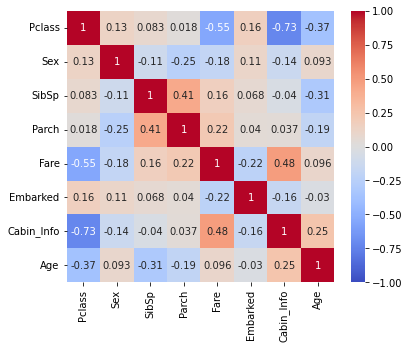

In [12]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_df['Sex'] = label.fit_transform(train_df['Sex'])
train_df['Embarked'] = label.fit_transform(train_df['Embarked'])

# Correlation map in train dataset
correlation = train_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_Info', 'Age']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

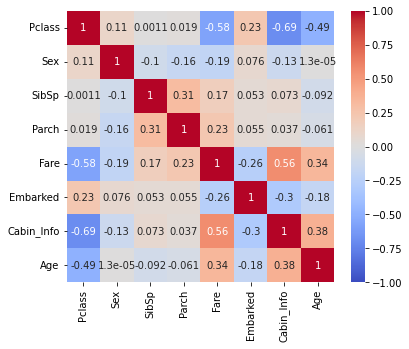

In [13]:
test_df['Sex'] = label.fit_transform(test_df['Sex'])
test_df['Embarked'] = label.fit_transform(test_df['Embarked'])

# Correlation map in test dataset
correlation = test_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_Info', 'Age']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [14]:
# Fill 'Age' missing value by using KNNImputer method
# Use strong correlated features with 'Age': Pclass, SibSp, Parch, Fare, Embarked, Cabin_Info

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_Info', 'Age']
train_df[features] = imputer.fit_transform(train_df[features])
test_df[features] = imputer.fit_transform(test_df[features])

In [15]:
train_df['Age'].isnull().sum()

0

In [16]:
test_df['Age'].isnull().sum()

0

In [17]:
# Check missing value

train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    float64
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    float64
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    float64
 8   Cabin_Info  891 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 62.8 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    float64
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float

In [18]:
# Create new feature 'Family_Size', which combines 'SibSp' and 'Parch' feature

train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

# Delete 'SibSp' and 'Parch' feature
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Info,Family_Size
0,0,3.0,1,22.0,7.2500,2.0,0.0,2.0
1,1,1.0,0,38.0,71.2833,0.0,1.0,2.0
2,1,3.0,0,26.0,7.9250,2.0,0.0,1.0
3,1,1.0,0,35.0,53.1000,2.0,1.0,2.0
4,0,3.0,1,35.0,8.0500,2.0,0.0,1.0


In [20]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Cabin_Info,Family_Size
0,892,3.0,1,34.5,7.8292,1.0,0.0,1.0
1,893,3.0,0,47.0,7.0000,2.0,0.0,2.0
2,894,2.0,1,62.0,9.6875,1.0,0.0,1.0
3,895,3.0,1,27.0,8.6625,2.0,0.0,1.0
4,896,3.0,0,22.0,12.2875,2.0,0.0,3.0


In [21]:
train_df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Info,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.964110,32.204208,1.536476,0.228956,1.904602
std,0.486592,0.836071,0.477990,13.459814,49.693429,0.791503,0.420397,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.400000,7.910400,1.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,28.600000,14.454200,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,37.000000,31.000000,2.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,1.000000,11.000000


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 7), (712,), (179, 7), (179,))

In [23]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Cabin_Info,Family_Size
331,1.0,1,45.5,28.5000,2.0,1.0,1.0
733,2.0,1,23.0,13.0000,2.0,0.0,1.0
382,3.0,1,32.0,7.9250,2.0,0.0,1.0
704,3.0,1,26.0,7.8542,2.0,0.0,2.0
813,3.0,0,6.0,31.2750,2.0,0.0,7.0


In [24]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_dt))

Accuracy:  0.7541899441340782


In [ ]:
# Fine-tune decision tree model and find the best parameters

from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

best_decision_tree = grid_search_dt.best_estimator_
print("Best Grid: ", best_decision_tree)

best_params_dt = grid_search_dt.best_params_
print("Best parameters: ", best_params_dt)

new_y_pred_dt = best_decision_tree.predict(X_test)
print("After fine-tune accuracy: ", accuracy_score(y_test, new_y_pred_dt))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Grid:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)
Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
After fine-tune accuracy:  0.7988826815642458


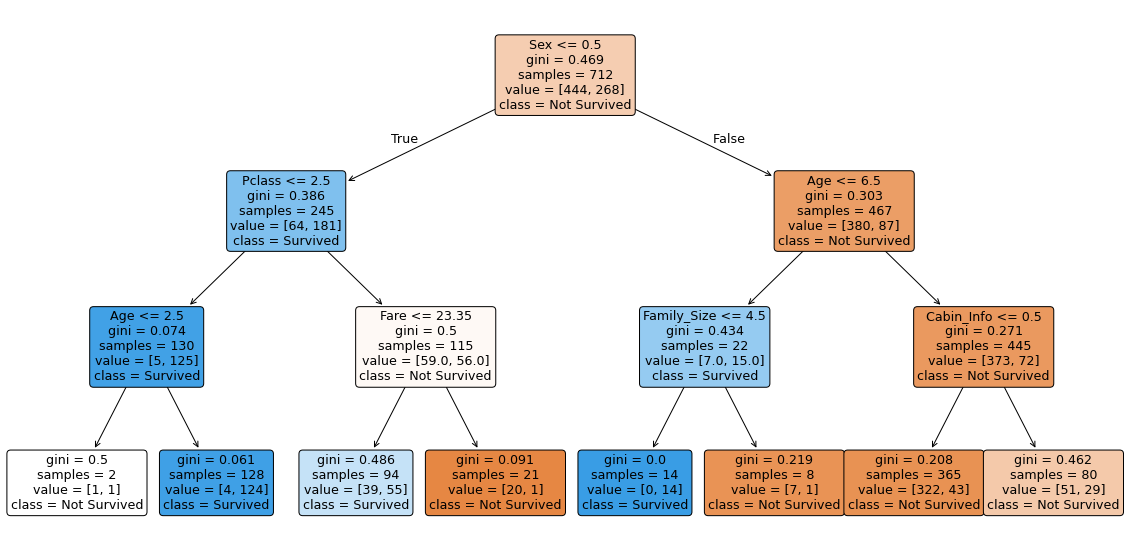

In [26]:
# Plot decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_decision_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()

In [27]:
# Apply the five-fold cross validation of decision tree and extract average classification accuracy

from sklearn.model_selection import cross_val_score

cv_scores_dt = cross_val_score(best_decision_tree, X_train, y_train, cv=5)
average_accuracy_dt = cv_scores_dt.mean()

print("Decision Tree Cross Validation Score: ", cv_scores_dt)
print("Decision Tree Average Classification Accuracy: ", average_accuracy_dt)

Decision Tree Cross Validation Score:  [0.82517483 0.83916084 0.81690141 0.78873239 0.83098592]
Decision Tree Average Classification Accuracy:  0.8201910765291046


In [28]:
# Random Forest

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Accuracy:  0.8212290502793296


In [ ]:
# Fine-tune random forest model and find the best parameters

param_grid_rf = {
    'n_estimators': [10, 100, 1000, 2000],
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, 
                           cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

best_random_forest = grid_search_rf.best_estimator_
print("Best Grid: ", best_random_forest)

best_params_rf = grid_search_rf.best_params_
print("Best parameters: ", best_params_rf)

new_y_pred_rf = best_random_forest.predict(X_test)
print("After fine-tune accuracy: ", accuracy_score(y_test, new_y_pred_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1,

In [30]:
# Apply the five-fold cross validation of random forest and extract average classification accuracy

from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(best_random_forest, X_train, y_train, cv=5)
average_accuracy_rf = cv_scores_rf.mean()

print("Random Forest Cross Validation Score: ", cv_scores_rf)
print("Random Forest Average Classification Accuracy: ", average_accuracy_rf)

Random Forest Cross Validation Score:  [0.83916084 0.84615385 0.83802817 0.80985915 0.83802817]
Random Forest Average Classification Accuracy:  0.8342460356544864
